In [101]:
import pandas as pd
import numpy as np

- (1) 데이터 가져오기

In [43]:
train_df = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
test_df = pd.read_csv('~/data/data/bike-sharing-demand/test.csv')

In [44]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [45]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


(2) datetime컬럼을 연, 월, 일, 시, 분, 초 컬럼으로 분리

In [47]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])

In [52]:
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['day'] = train_df['datetime'].dt.day
train_df['hour'] = train_df['datetime'].dt.hour
train_df['minute'] = train_df['datetime'].dt.minute
train_df['second'] = train_df['datetime'].dt.second

In [80]:
test_df['datetime'] = pd.to_datetime(test_df['datetime'])
test_df['year'] = test_df['datetime'].dt.year
test_df['month'] = test_df['datetime'].dt.month
test_df['day'] = test_df['datetime'].dt.day
test_df['hour'] = test_df['datetime'].dt.hour
test_df['minute'] = test_df['datetime'].dt.minute
test_df['second'] = test_df['datetime'].dt.second

In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

In [54]:
train_df = train_df.drop(['datetime'], axis=1)

In [84]:
test_df = test_df.drop(['datetime'], axis=1)

In [55]:
train_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

- (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

In [65]:
print(len(train_df[train_df['month'] == 1]))
print(len(train_df[train_df['month'] == 2]))
print(len(train_df[train_df['month'] == 5]))
print(len(train_df[train_df['month'] == 5]))
print(len(train_df[train_df['month'] == 7]))
print(len(train_df[train_df['month'] == 9]))
print(len(train_df[train_df['month'] == 11]))

884
901
912
912
912
909
911


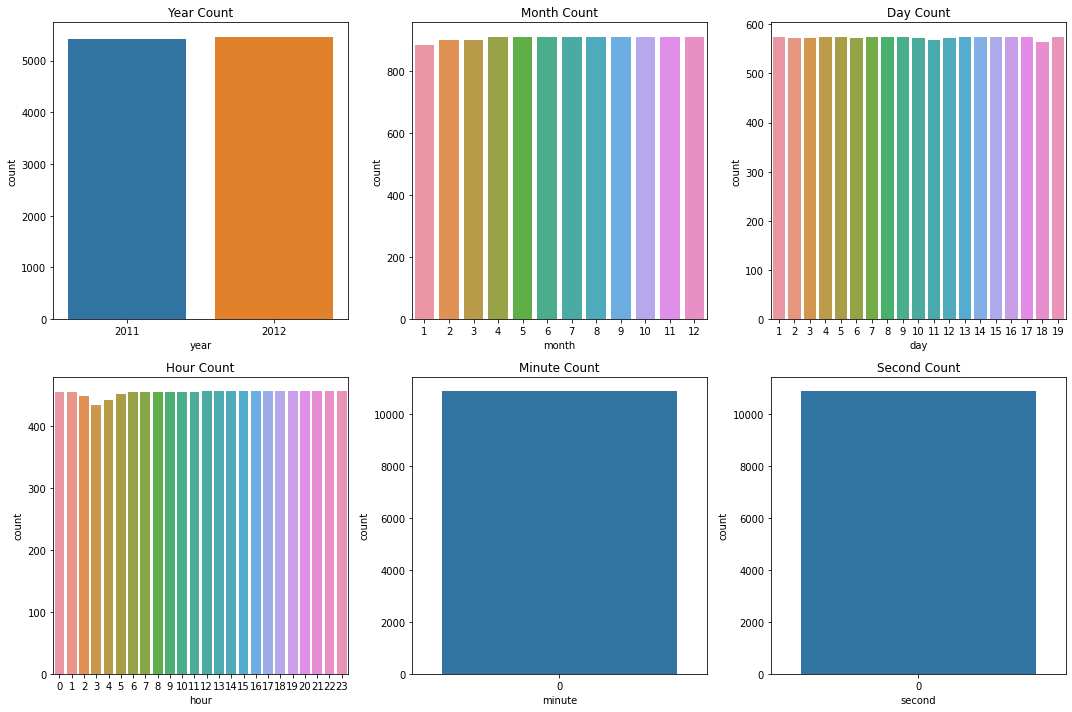

In [58]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(data=train_df, x='year')
plt.title('Year Count')

plt.subplot(2, 3, 2)
sns.countplot(data=train_df, x='month')
plt.title('Month Count')

plt.subplot(2, 3, 3)
sns.countplot(data=train_df, x='day')
plt.title('Day Count')

plt.subplot(2, 3, 4)
sns.countplot(data=train_df, x='hour')
plt.title('Hour Count')

plt.subplot(2, 3, 5)
sns.countplot(data=train_df, x='minute')
plt.title('Minute Count')

plt.subplot(2, 3, 6)
sns.countplot(data=train_df, x='second')
plt.title('Second Count')

plt.tight_layout()
plt.show()

- (4), (5) 컬럼 선택하고 train test 분리하고 모델 학습 진행

In [69]:
train_df = train_df.drop(['casual', 'registered'], axis=1)

In [70]:
x_train, y_train = train_df.drop(['count'], axis=1), train_df['count']

In [72]:
x_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,4,0,0


In [73]:
x_train.shape, y_train.shape

((10886, 14), (10886,))

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

- (6) x_test에 대한 예측값 출력 및 손실함수 계산

In [97]:
pred = model.predict(x_test.values)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [99]:
mse = mean_squared_error(y_test, pred)
mse

19945.370053754035

In [102]:
rmse = np.sqrt(mse)
rmse

141.22807813517124

- (7) humidity 컬럼과 temp컬럼을 x축으로 하고 y축은 예측값 시각화

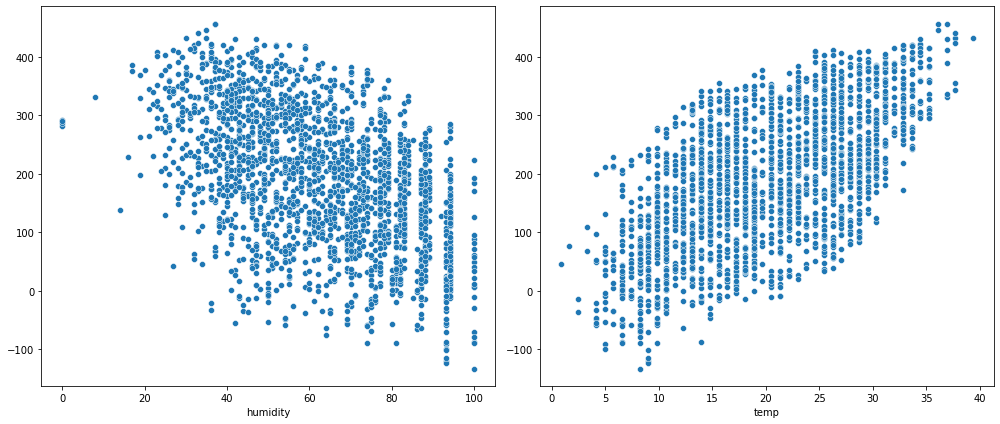

In [106]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) 
sns.scatterplot(x=x_test['humidity'], y=pred)

plt.subplot(1, 2, 2)  
sns.scatterplot(x=x_test['temp'], y=pred)

plt.tight_layout()
plt.show()